<a href="https://colab.research.google.com/github/GyaaniJ/pytorch-deep-learning/blob/main/My%20notebook/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torchvision.transforms
torch.utlis.data.Dataset
torch.utlis.data.DataLoader

torch.optim
torchmetrics
torch.utlis.tensorboard

In [ ]:
# <!-- *torchvision - base domain lib for PyTorch CV
# *torchvision.datasets  - get datasets and data loading functions for computer vision here
# *torchvision.models - get pretrained cv models
# *torchvision.transforms - functions for manipulting vision data - for suitable ml model
# *torch,utils.data.Dataset - Base dataset class for pytorch
# *torch.utils.data.DataLoader - create python iterable over a dataset -->

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Getting the dataset


#using FashionMNIST

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform=ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1829798.29it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 131511.73it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 512898.30it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4968310.40it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

#See the first training example

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Access and print the labels
labels = train_data.targets
print("Labels:", labels[:10])

# Access and print the class names
class_names = train_data.classes
print("Class names:", class_names)

# Access and print the class to index mapping
class_to_idx = train_data.class_to_idx
print("Class to index mapping:", class_to_idx)

# Access and print the raw image data
images = train_data.data
print("Raw image data shape:", images.shape)

# Access and print the first sample
image, label = train_data[0]
print("First sample - image shape:", image.shape, ", label:", label)

Labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Class to index mapping: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
Raw image data shape: torch.Size([60000, 28, 28])
First sample - image shape: torch.Size([1, 28, 28]) , label: 9


In [ ]:
image, label = train_data[0]
type(label)
image.shape

torch.Size([1, 28, 28])

In [ ]:
sample = train_data[0]
print(type(sample))  # Check the type of the sample
len(sample)

<class 'tuple'>


2

Text(0.5, 1.0, '9')

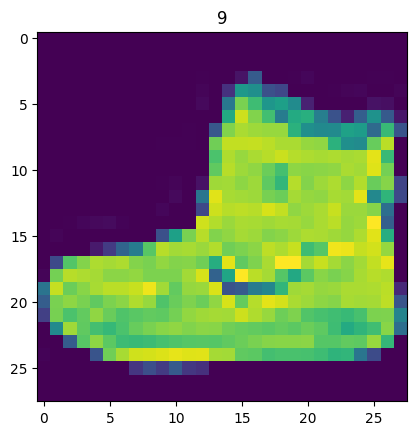

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image[0])
plt.title(label)

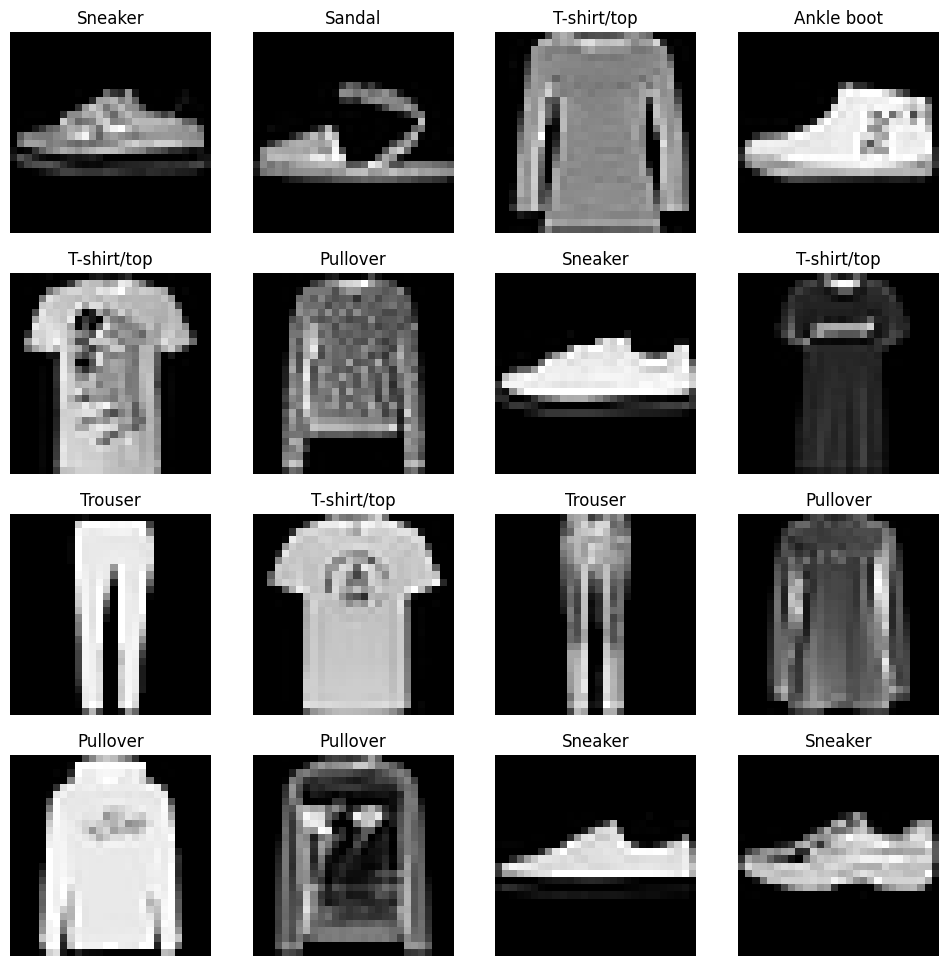

In [ ]:
#torch.manual_seed(44)
fig = plt.figure(figsize = (12,12))
rows, cols = 4,4
for i in range(1, rows* cols +1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot (rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


#2. prepare a dataloder

# torch.utils.data.DataLoader

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE =32

train_dataloader = DataLoader(train_data, batch_size =BATCH_SIZE,
                              shuffle = True
                              )
test_dataloader = DataLoader (test_data, batch_size = BATCH_SIZE, shuffle = True)


In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f0bb3b5a860>, <torch.utils.data.dataloader.DataLoader object at 0x7f0bb3b5a8f0>)


In [ ]:
print(f"Length of train dataloader: {len(train_dataloader)}")

Length of train dataloader: 1875


In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layer: int)